this notebook is for Week6-Assignment
author: Rui Zeng, N15471955, rz2522@nyu.edu
assignment:Do masterclass exercise 1. The unbiased simulations should run in about 2 minutes on 1 cpu
	- Use numpy to read in the COLVAR files and matplotlib to plot the dihedrals.
	- Use mdtraj to compute the phi and psi dihedrals from the output xtc file. Plot them on top of the ones from the COLVAR file, making sure they agree!
	- **I suggest you plot phi vs psi with plt.scatter to get a ramachandran-like plot instead of looking vs time**
	- Compute the standard deviation of phi and the standard deviation of psi from the unbiased runs to give you an idea of the SIGMA values for metadynamics in the next step. 

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md

In [2]:
# trajectory path
xtc_filename_A='../Data/Masterclass_exercise1_topolA_simulation/traj_comp.xtc'
xtc_filename_B='../Data/Masterclass_exercise1_topolB_simulation/traj_comp.xtc'
# topology path
gro_filename_A = '../Data/Masterclass_exercise1_topolA_simulation/confout.gro'
gro_filename_B = '../Data/Masterclass_exercise1_topolB_simulation/confout.gro'
# COLVAR path
colvar_filename_A='../Data/Masterclass_exercise1_topolA_simulation/COLVAR'
colvar_filename_B='../Data/Masterclass_exercise1_topolB_simulation/COLVAR'
# load trajectory
xtc_A = md.load(xtc_filename_A, top=gro_filename_A)
xtc_B = md.load(xtc_filename_B, top=gro_filename_B)
# load COLVAR
colvar_A = np.loadtxt(colvar_filename_A)
colvar_B = np.loadtxt(colvar_filename_B)

In [11]:
# check the shape of the trajectory
print('check the shape of the trajectory')
print('xtc_A', xtc_A.xyz.shape)
print('xtc_B', xtc_B.xyz.shape)
# check the shape of the COLVAR
print('check the shape of the COLVAR')
print('colvar_A', colvar_A.shape)
print('colvar_B', colvar_B.shape)
# check the frame number of the trajectory
print('check the frame number of the trajectory')
print('xtc_A', xtc_A.n_frames)
print('xtc_B', xtc_B.n_frames)
# check the frame number of the COLVAR
print('check the frame number of the COLVAR')
print('colvar_A', colvar_A.shape[0])
print('colvar_B', colvar_B.shape[0])

check the shape of the trajectory
xtc_A (100001, 22, 3)
xtc_B (100001, 22, 3)
check the shape of the COLVAR
colvar_A (100001, 3)
colvar_B (100001, 3)
check the frame number of the trajectory
xtc_A 100001
xtc_B 100001
check the frame number of the COLVAR
colvar_A 100001
colvar_B 100001


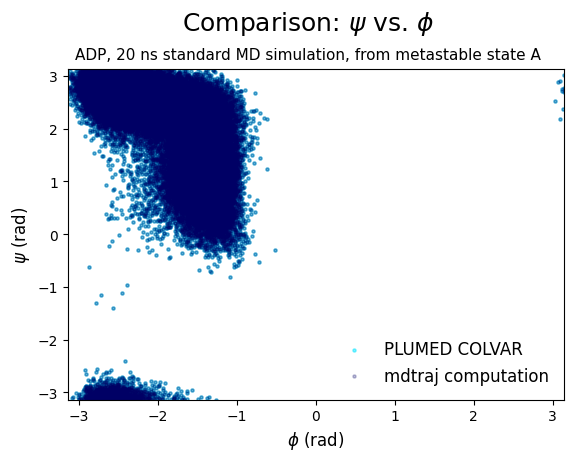

In [105]:
# figure 1 - plot phi_vs_psi, compare xtc_A and colvar_A
fig=plt.figure(1)

# load phi and psi from colvar_A
phi_colvar_A = colvar_A[:,1]
psi_colvar_A = colvar_A[:,2]
# load phi and psi from xtc_A
phi_xtc_A = md.compute_phi(xtc_A)[1]
psi_xtc_A = md.compute_psi(xtc_A)[1]

# settings for the scatter plot
# colorblind-friendly color, the overlap is also colorblind-friendly
color1 = '#00e4ff'
color2 = '#000065'
# alpha setting
alpha1 = 0.5
alpha2 = 0.25
# marker setting
marker1 = 'o'
marker2 = 'o'
# size setting
size1 = 5
size2 = 5
# plot every Nth frame
N=1

# plot phi_vs_psi from colvar_A, scatter plot, colorblind friendly, y is psi, x is phi
plt.scatter(phi_colvar_A[::N], psi_colvar_A[::N], color=color1, alpha=alpha1, marker=marker1, s=size1, label='PLUMED COLVAR')
# plot legend, righttop, fontsize 12
plt.legend(loc='lower right', fontsize=12, frameon=False)
# plot phi_vs_psi from xtc_A, scatter plot, colorblind friendly, y is psi, x is phi
plt.scatter(phi_xtc_A[::N], psi_xtc_A[::N], color=color2, alpha=alpha2, marker=marker2, s=size2, label='mdtraj computation')
# plot legend, righttop, fontsize 12
plt.legend(loc='lower right', fontsize=12, frameon=False)

# set axis range
plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)

# labels, unit rad, fontsize 12
plt.xlabel(r'$\phi$ (rad)', fontsize=12)
plt.ylabel(r'$\psi$ (rad)', fontsize=12)

# two lines of title
plt.text(x=0.5, y=0.88, s="Comparison: "r"$\psi$"" vs. ""$\phi$", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "ADP, 20 ns standard MD simulation, from metastable state A", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)

# save figure as pdf in ../Figures
fname = '../Figures/fig1.[topolA]psi&phi_comparison.pdf'
plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')

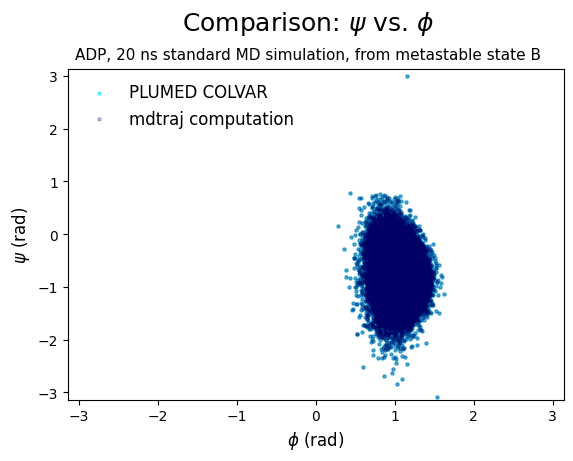

In [106]:
# figure 2 - plot phi_vs_psi, compare xtc_B and colvar_B
fig=plt.figure(2)

# load phi and psi from colvar_B
phi_colvar_B = colvar_B[:,1]
psi_colvar_B = colvar_B[:,2]
# load phi and psi from xtc_B
phi_xtc_B = md.compute_phi(xtc_B)[1]
psi_xtc_B = md.compute_psi(xtc_B)[1]

# settings for the scatter plot
# colorblind-friendly color, the overlap is also colorblind-friendly
color1 = '#00e4ff'
color2 = '#000065'
# alpha setting
alpha1 = 0.5
alpha2 = 0.25
# marker setting
marker1 = 'o'
marker2 = 'o'
# size setting
size1 = 5
size2 = 5
# plot every Nth frame
N=1

# plot phi_vs_psi from colvar_B, scatter plot, colorblind friendly, y is psi, x is phi
plt.scatter(phi_colvar_B[::N], psi_colvar_B[::N], color=color1, alpha=alpha1, marker=marker1, s=size1, label='PLUMED COLVAR')
# plot legend, righttop, fontsize 12
plt.legend(loc='upper left', fontsize=12, frameon=False)
# plot phi_vs_psi from xtc_B, scatter plot, colorblind friendly, y is psi, x is phi
plt.scatter(phi_xtc_B[::N], psi_xtc_B[::N], color=color2, alpha=alpha2, marker=marker2, s=size2, label='mdtraj computation')
# plot legend, righttop, fontsize 12
plt.legend(loc='upper left', fontsize=12, frameon=False)

# set axis range
plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)

# labels, unit rad, fontsize 12
plt.xlabel(r'$\phi$ (rad)', fontsize=12)
plt.ylabel(r'$\psi$ (rad)', fontsize=12)

# two lines of title
plt.text(x=0.5, y=0.88, s="Comparison: "r"$\psi$"" vs. ""$\phi$", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "ADP, 20 ns standard MD simulation, from metastable state B", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)

# save figure as pdf in ../Figures
fname = '../Figures/fig2.[topolB]psi&phi_comparison.pdf'
plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')

In [93]:
# compute standard deviation of phi and psi from colvar_A
phi_colvar_A_std = np.std(phi_colvar_A)
# compute standard deviation of phi and psi from xtc_A
phi_xtc_A_std = np.std(phi_xtc_A)
# compute standard deviation of phi and psi from colvar_B
phi_colvar_B_std = np.std(phi_colvar_B)
# compute standard deviation of phi and psi from xtc_B
phi_xtc_B_std = np.std(phi_xtc_B)


In [120]:
# metastable state A
print('20 ns standard MD simulation (i.e. bias factor = 1) start from metastable state A')
# print standard deviation of phi and psi from colvar_A
print("standard deviation (PLUMED COLVAR) = ", phi_colvar_A_std)
# print standard deviation of phi and psi from xtc_A
print("standard deviation (MD simulation) = ", phi_xtc_A_std)

# metastable state B
print('20 ns standard MD simulation (i.e. bias factor = 1) start from metastable state B')
# print standard deviation of phi and psi from colvar_B
print("standard deviation (PLUMED COLVAR) = ", phi_colvar_B_std)
# print standard deviation of phi and psi from xtc_B
print("standard deviation (MD simulation) = ", phi_xtc_B_std)


20 ns standard MD simulation (i.e. bias factor = 1) start from metastable state A
standard deviation (PLUMED COLVAR) =  0.5538100218279401
standard deviation (MD simulation) =  0.55381006
20 ns standard MD simulation (i.e. bias factor = 1) start from metastable state B
standard deviation (PLUMED COLVAR) =  0.13210024266183035
standard deviation (MD simulation) =  0.13210024
